<a href="https://colab.research.google.com/github/Javier-Alfonso-DS/S03_T05_Exploracio_de_les_dades/blob/main/S03_T05_Exploracio_de_les_dades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informació Tasca:
---
Descripció
---
Familiaritza't amb les tècniques d'exploració de les dades mitjantçant la estructura de dades, Dataframe amb la llibreria Pandas.
Nivell 1
---
Exercici 1
---
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

Exercici 2
---
Fes un informe complet del data set:.

Resumeix estadísticament les columnes d’interès
Troba quantes dades faltants hi ha per columna
Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
Taula de les aerolínies amb més endarreriments acumulats
Quins són els vols més llargs? I els més endarrerits?
Etc.
Exercici 3
---
Exporta el data set net i amb les noves columnes a Excel.

Informació dades:
---
The results
---
We had a total of nine entries, and turn out at the poster session at the JSM was great, with plenty of people stopping by to find out why their flights were delayed.
The data
---
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed. To make sure that you're not overwhelmed by the size of the data, we've provide two brief introductions to some useful tools: linux command line tools and sqlite, a simple sql database.
The challenge
---
The aim of the data expo is to provide a graphical summary of important features of the data set. This is intentionally vague in order to allow different entries to focus on different aspects of the data, but here are a few ideas to get you started:

* When is the best time of day/day of week/time of year to fly to minimise delays?
* Do older planes suffer more delays?
* How does the number of people flying between different locations change over time?
* How well does weather predict plane delays?
* Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?

You are also welcome to work with interesting subsets: you might want to compare flight patterns before and after 9/11, or between the pair of cities that you fly between most often, or all flights to and from a major airport like Chicago (ORD). Smaller subsets may also help you to match up the data to other interesting datasets.

In [1]:
# Montamos Google Drive para tener acceso a los datos
from google.colab import drive
drive.mount('/content/drive/')
# remember to escape white spaces
%cd /content/drive/My\ Drive/Data

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Data


In [2]:
# Actualización de librería pandas en entorno Colab.
import pandas as pd
print(pd.__version__)
!pip install --upgrade pandas
print(pd.__version__)

1.3.4
1.3.4


In [3]:
# Importación de librerías, mejora de presentación gráfica via parámetros y lectura de los datos brutos 
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

#Fuerza la salida de float como 1 sólo decimal
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#Lectura de datos csv
df = pd.read_csv('./DelayedFlights.csv')

# Exercici 1: Exploració de dades
Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

## Descripció de les variables: ✈
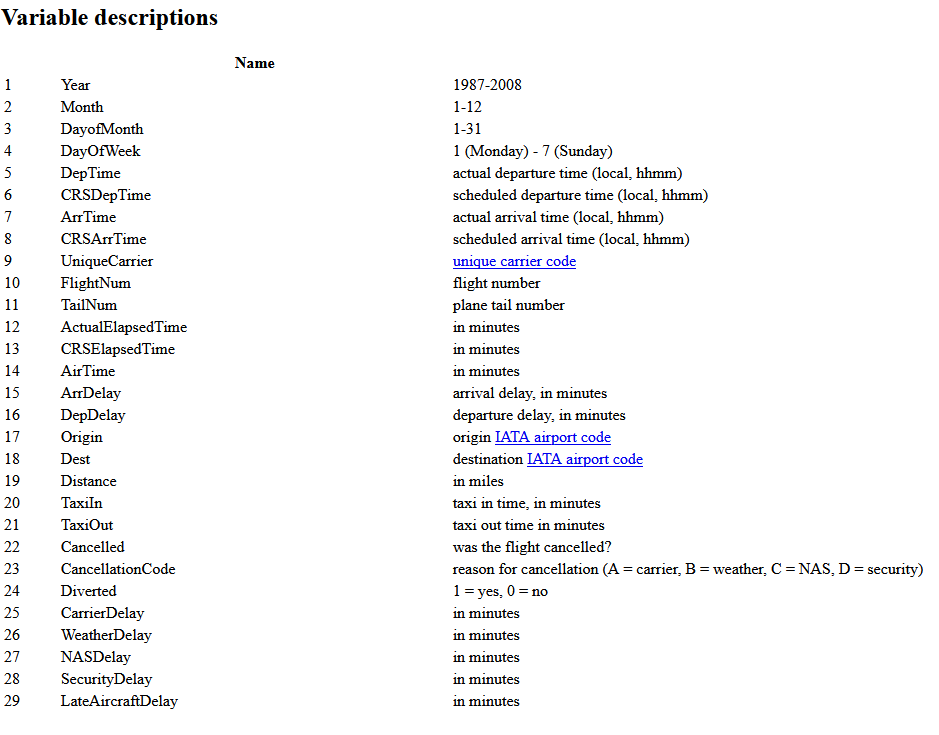



## Causes de retards - Codi de cancel·lació:

* Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
* Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
* National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.
* Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.
* Security: Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.


In [4]:
# Exploració de les dades
print(df.info(verbose='true',show_counts='true')) 
#df.describe
print(df.head())
print(df.tail())
print ("# Observem que hi han 1.9 Millions de registres i que a les columnes 25 a 29 (index) hi han bastants NaN (0,7M)")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1936758 non-null  int64  
 1   Year               1936758 non-null  int64  
 2   Month              1936758 non-null  int64  
 3   DayofMonth         1936758 non-null  int64  
 4   DayOfWeek          1936758 non-null  int64  
 5   DepTime            1936758 non-null  float64
 6   CRSDepTime         1936758 non-null  int64  
 7   ArrTime            1929648 non-null  float64
 8   CRSArrTime         1936758 non-null  int64  
 9   UniqueCarrier      1936758 non-null  object 
 10  FlightNum          1936758 non-null  int64  
 11  TailNum            1936753 non-null  object 
 12  ActualElapsedTime  1928371 non-null  float64
 13  CRSElapsedTime     1936560 non-null  float64
 14  AirTime            1928371 non-null  float64
 15  ArrDelay           1928371 non-n

Observem que hi han 1.9 Millions de registres i que a les columnes 25 a 29 (index) hi han bastants NaN (0,7M).

In [5]:
# Treiem columnes que no semblen rellevants amb drop (crea una nou df si no es posa inplace=True)
# Treiem la primera columna que es l'index repetit.
print(df.columns)
workdf = df.drop(columns = 'Unnamed: 0',axis=1)
print ("# Treiem la primera columna que es l'index repetit.")
workdf.head()

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')
# Treiem la primera columna que es l'index repetit.


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# Exercici 2: Fer informe complet del dataset
---
Fes un informe complet del data set:.

Resumeix estadísticament les columnes d’interès Troba quantes dades faltants hi ha per columna Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...) Taula de les aerolínies amb més endarreriments acumulats Quins són els vols més llargs? I els més endarrerits? Etc.

In [6]:
print(workdf.info(verbose='true',show_counts='true')) 
workdf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1936758 non-null  int64  
 1   Month              1936758 non-null  int64  
 2   DayofMonth         1936758 non-null  int64  
 3   DayOfWeek          1936758 non-null  int64  
 4   DepTime            1936758 non-null  float64
 5   CRSDepTime         1936758 non-null  int64  
 6   ArrTime            1929648 non-null  float64
 7   CRSArrTime         1936758 non-null  int64  
 8   UniqueCarrier      1936758 non-null  object 
 9   FlightNum          1936758 non-null  int64  
 10  TailNum            1936753 non-null  object 
 11  ActualElapsedTime  1928371 non-null  float64
 12  CRSElapsedTime     1936560 non-null  float64
 13  AirTime            1928371 non-null  float64
 14  ArrDelay           1928371 non-null  float64
 15  DepDelay           1936758 non-n

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1936758.0,1929648.0,1936758.0,1936758.0,1928371.0,1936560.0,1928371.0,1928371.0,1936758.0,1936758.0,1929648.0,1936303.0,1936758.0,1936758.0,1247488.0,1247488.0,1247488.0,1247488.0,1247488.0
mean,2008.0,6.1,15.8,4.0,1518.5,1467.5,1610.1,1634.2,2184.3,133.3,134.3,108.3,42.2,43.2,765.7,6.8,18.2,0.0,0.0,19.2,3.7,15.0,0.1,25.3
std,0.0,3.5,8.8,2.0,450.5,424.8,548.2,464.6,1944.7,72.1,71.3,68.6,56.8,53.4,574.5,5.3,14.3,0.0,0.1,43.5,21.5,33.8,2.0,42.1
min,2008.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,14.0,-25.0,0.0,-109.0,6.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2008.0,3.0,8.0,2.0,1203.0,1135.0,1316.0,1325.0,610.0,80.0,82.0,58.0,9.0,12.0,338.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2008.0,6.0,16.0,4.0,1545.0,1510.0,1715.0,1705.0,1543.0,116.0,116.0,90.0,24.0,24.0,606.0,6.0,14.0,0.0,0.0,2.0,0.0,2.0,0.0,8.0
75%,2008.0,9.0,23.0,6.0,1900.0,1815.0,2030.0,2014.0,3422.0,165.0,165.0,137.0,56.0,53.0,998.0,8.0,21.0,0.0,0.0,21.0,0.0,15.0,0.0,33.0
max,2008.0,12.0,31.0,7.0,2400.0,2359.0,2400.0,2400.0,9742.0,1114.0,660.0,1091.0,2461.0,2467.0,4962.0,240.0,422.0,1.0,1.0,2436.0,1352.0,1357.0,392.0,1316.0


## Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...) 

### Creem la columna velocitat mitjana MeanSpeed

A primera vista, la columna s'hauria de fer mitjançant Distància \ Temps a l'aire Distance/Airtime*60.

Explorem primer aquestes dues columnes:

In [7]:
print("Distance:")
print(workdf['Distance'].describe())
print("AirTime:")
print(workdf['AirTime'].describe())
workdf.sort_values(by='AirTime').head(10)


Distance:
count   1936758.0
mean        765.7
std         574.5
min          11.0
25%         338.0
50%         606.0
75%         998.0
max        4962.0
Name: Distance, dtype: float64
AirTime:
count   1928371.0
mean        108.3
std          68.6
min           0.0
25%          58.0
50%          90.0
75%         137.0
max        1091.0
Name: AirTime, dtype: float64


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
54342,2008,1,6,7,1414.0,1307,1547.0,1403,OO,3689,N581SW,93.0,56.0,0.0,104.0,67.0,TWF,SLC,175,90.0,3.0,0,N,0,0.0,104.0,0.0,0.0,0.0
782761,2008,5,21,3,1815.0,1805,1909.0,1857,OO,5583,N568SW,54.0,52.0,0.0,12.0,10.0,LAX,SAN,109,52.0,2.0,0,N,0,NaN,NaN,NaN,NaN,NaN
414132,2008,3,31,1,1540.0,1530,1804.0,1740,XE,555,N14562,144.0,130.0,0.0,24.0,10.0,MSY,MCI,690,4.0,140.0,0,N,0,0.0,0.0,24.0,0.0,0.0
53543,2008,1,5,6,1318.0,1140,1456.0,1258,OO,3705,N581SW,98.0,78.0,0.0,118.0,98.0,SGU,SLC,269,96.0,2.0,0,N,0,0.0,0.0,0.0,0.0,118.0
784702,2008,5,27,2,1452.0,1437,1520.0,1522,OO,5414,N271YV,28.0,45.0,0.0,-2.0,15.0,SAN,LAX,109,25.0,3.0,0,N,0,NaN,NaN,NaN,NaN,NaN
245633,2008,2,12,2,1928.0,1631,2318.0,2015,OO,5854,N763SK,170.0,164.0,0.0,183.0,177.0,ASE,ORD,1013,8.0,162.0,0,N,0,0.0,0.0,183.0,0.0,0.0
441835,2008,3,18,2,1759.0,1611,2132.0,1955,OO,5854,N765SK,153.0,164.0,0.0,97.0,108.0,ASE,ORD,1013,12.0,141.0,0,N,0,0.0,0.0,97.0,0.0,0.0
1248647,2008,7,29,2,2235.0,2005,139.0,2146,B6,602,N238JB,184.0,101.0,1.0,233.0,150.0,JFK,PWM,274,61.0,122.0,0,N,0,9.0,0.0,224.0,0.0,0.0
53539,2008,1,5,6,1621.0,1400,1821.0,1602,OO,3699,N581SW,60.0,62.0,1.0,139.0,141.0,EKO,SLC,200,6.0,53.0,0,N,0,0.0,0.0,0.0,0.0,139.0
622668,2008,4,25,5,2110.0,1930,2139.0,2007,OO,6577,N945SW,29.0,37.0,1.0,92.0,100.0,DEN,COS,72,4.0,24.0,0,N,0,0.0,0.0,0.0,0.0,92.0


Observem que hi han 7 registres amb valors de Airtime = 0, i també més registres amb valors = 1, 2, 3. Fem un value_counts per tenir l'ordre de magnitud.

In [8]:

workdf.loc[workdf.AirTime < 30, 'AirTime'].value_counts()


29.0    7278
28.0    6609
27.0    5941
26.0    5352
25.0    4727
24.0    4136
22.0    4065
23.0    3886
21.0    3766
20.0    2946
19.0    2158
18.0    1564
17.0    1213
16.0     802
15.0     483
14.0     340
13.0     165
12.0      89
11.0      59
10.0      50
9.0       43
8.0       23
6.0       12
7.0        9
1.0        9
5.0        8
0.0        7
3.0        6
4.0        6
2.0        6
Name: AirTime, dtype: int64

La columna Airtime té valors 0, 1,2,3,4,5 que no semblen incorrectes.

Finalment decidim la següent Hipòtesis:

Hipòtesis 1.- El temps de un vol d'avió no pot ser inferior a 30 min. Així que eliminem aquests registres amb drop.

In [9]:
workdf.drop(workdf[workdf.AirTime<30].index, inplace=True)
workdf.loc[workdf.AirTime < 30, 'AirTime'].value_counts()

Series([], Name: AirTime, dtype: int64)

Creem la columna velocitat mitjana MeanSpeed. 
Calculem la  Distància \ Temps a l'aire.

count   1872613.0
mean        400.5
std          73.1
min          21.3
25%         357.0
50%         406.3
75%         449.5
max        1652.3
Name: MeanSpeed, dtype: float64


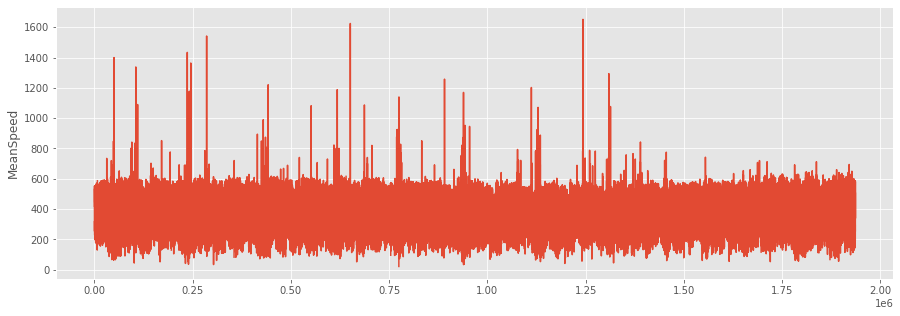

In [10]:
workdf['MeanSpeed'] = workdf['Distance']/workdf['AirTime']*60 # Velocitat mitjana en mph
workdf['MeanSpeed'].plot(ylabel="MeanSpeed")
print(workdf['MeanSpeed'].describe())

Creem la columna Delayed

In [11]:
workdf['Delayed'] = workdf['ArrDelay']> 0
print("El número de vols que han arribat tard es",workdf['Delayed'].sum(),"de",len(workdf))
print("A continuació es mostra el df amb les columnes noves MeanSpeed, Delayed")

workdf.sort_values(by='MeanSpeed',ascending=False)   


El número de vols que han arribat tard es 1670887 de 1881000
A continuació es mostra el df amb les columnes noves MeanSpeed, Delayed


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MeanSpeed,Delayed
1243284,2008,7,1,2,2237.0,1740,57.0,2038,B6,136,N536JB,140.0,178.0,39.0,259.0,297.0,RSW,JFK,1074,92.0,9.0,0,N,0,0.0,0.0,0.0,0.0,259.0,1652.3,True
651140,2008,4,20,7,2014.0,1553,408.0,2358,DL,624,N704X,294.0,305.0,83.0,250.0,261.0,LAS,JFK,2248,200.0,11.0,0,N,0,0.0,0.0,0.0,0.0,250.0,1625.1,True
285430,2008,2,18,1,2000.0,1840,2212.0,2145,EV,4256,N354CA,72.0,125.0,34.0,27.0,80.0,SAT,ATL,874,6.0,32.0,0,N,0,27.0,0.0,0.0,0.0,0.0,1542.4,True
236195,2008,2,8,5,2025.0,1935,2216.0,2136,OH,5169,N739CA,111.0,121.0,31.0,40.0,50.0,CVG,MHT,741,66.0,14.0,0,N,0,40.0,0.0,0.0,0.0,0.0,1434.2,True
49719,2008,1,19,6,1625.0,1530,1807.0,1842,OH,5682,N442CA,42.0,132.0,30.0,-35.0,55.0,MSY,CVG,700,5.0,7.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1400.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935651,2008,12,10,3,1459.0,1447,NaN,1650,DL,1706,N914DN,NaN,123.0,NaN,NaN,12.0,ATL,BUF,712,NaN,37.0,1,A,0,NaN,NaN,NaN,NaN,NaN,NaN,False
1935716,2008,12,11,4,1355.0,1106,7.0,1950,DL,26,N3747D,NaN,344.0,NaN,NaN,169.0,LAX,JFK,2475,13.0,17.0,0,N,1,NaN,NaN,NaN,NaN,NaN,NaN,False
1935876,2008,12,11,4,1026.0,955,NaN,1219,DL,892,N928DL,NaN,144.0,NaN,NaN,31.0,ATL,JFK,760,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN,NaN,False
1935978,2008,12,11,4,1527.0,1520,2106.0,1708,DL,1102,N924DL,NaN,108.0,NaN,NaN,7.0,IAD,ATL,533,9.0,19.0,0,N,1,NaN,NaN,NaN,NaN,NaN,NaN,False


## Taula de les aerolínies amb més endarreriments acumulats Quins són els vols més llargs? I els més endarrerits? Etc.

In [12]:
#Primer de tot, veiem quins son les aerolinies que estàn a les dades
Carriers = workdf['UniqueCarrier'].unique()
print("Hi han",len(Carriers),"companyies aèrees. Son les següents:\n",Carriers)

Hi han 20 companyies aèrees. Son les següents:
 ['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']


In [13]:
# Contem quants vols hi han per companyia
CountCarrier = workdf['UniqueCarrier'].value_counts()
CountCarrier

WN    376408
AA    191510
UA    140810
MQ    131579
OO    117008
DL    113535
XE    102666
CO     99409
US     97619
EV     77858
NW     76556
FL     71282
YV     58630
B6     55305
OH     50836
9E     49639
AS     38078
F9     28268
HA      3572
AQ       432
Name: UniqueCarrier, dtype: int64

A continuació mostrem les companyies ordenades de menys a més endarreriments
WN: Southwest Airlines es la compañia amb més enderreriments però també amb més 
 distància recorreguda.


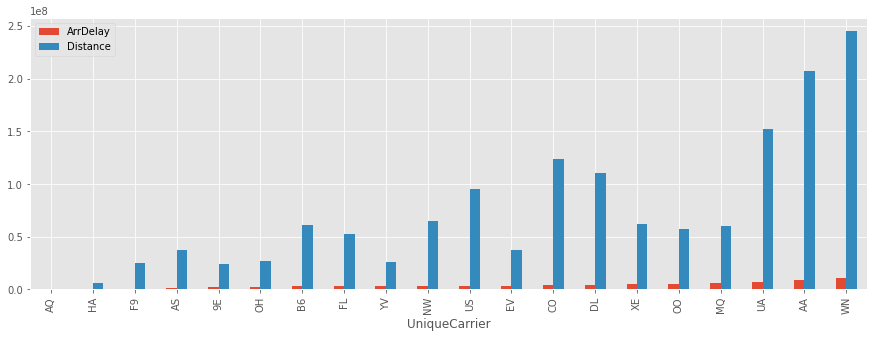

In [14]:
dfAirlines = workdf[['UniqueCarrier','ArrDelay','Distance']].groupby('UniqueCarrier').sum()
print("A continuació mostrem les companyies ordenades de menys a més endarreriments")
print("WN: Southwest Airlines es la compañia amb més enderreriments però també amb més \
\n distància recorreguda.")
dfAirlines.sort_values(by='ArrDelay').plot(kind='bar')

Fent el qüocient del retràs per la distància, veiem que el que menys 
 es retrasa es AQ i el que més es YV.
 WN està per la meitat de la llista en quant a retrassos per distància.


,ArrDelay,Distance,ArrDelay/Distance
UniqueCarrier,,,
AQ,9368.0,631428,1.5
HA,159978.0,6303888,2.5
F9,788528.0,25356926,3.1
CO,4023075.0,124131265,3.2
AS,1356222.0,37017469,3.7
US,3543052.0,95148181,3.7
DL,4508682.0,110544942,4.1
AA,8875370.0,207547415,4.3
UA,6705990.0,152647050,4.4


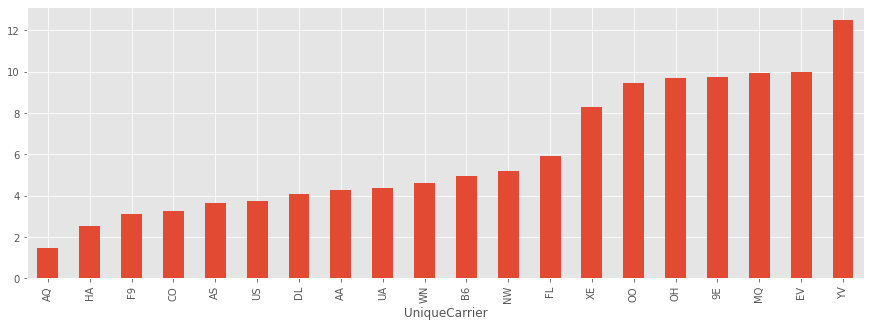

In [15]:
dfAirlines['ArrDelay/Distance'] = dfAirlines['ArrDelay']/dfAirlines['Distance']*100
print("Fent el qüocient del retràs per la distància, veiem que el que menys \n \
es retrasa es AQ i el que més es YV.\n WN està per la meitat de la llista en quant a \
retrassos per distància.")
dfAirlines['ArrDelay/Distance'].sort_values().plot(kind='bar')
dfAirlines.sort_values(by='ArrDelay/Distance')

In [16]:
workdf.sort_values(by='Distance',ascending=False)
MaxDistance = max(workdf['Distance']) 
print("La màxima distància es:",MaxDistance,"miles")
df_MaxDistance = workdf.loc[workdf['Distance'] == MaxDistance] # %timeit
#Explorem df_MaxDistance i veiem que els vols de EWR a HNL i volta son els més llargs.
print("El vol més llarg es el de:",df_MaxDistance['Origin'].head(1).values,"a",df_MaxDistance['Dest'].head(1).values)
MaxDelay = max(workdf['ArrDelay'])
print("L'enderreriment màxim es:",MaxDelay,"minuts","(",'{0:.2f}'.format(MaxDelay/60),"hores)")

La màxima distància es: 4962 miles
El vol més llarg es el de: ['EWR'] a ['HNL']
L'enderreriment màxim es: 2461.0 minuts ( 41.02 hores)


In [17]:
df_MaxDelay = workdf.loc[workdf['ArrDelay'] == MaxDelay]
print("El delay es per CarrierDelay:",df_MaxDelay['CarrierDelay'].values,"minutes i LateAircraftDelay",df_MaxDelay['LateAircraftDelay'].values)
print("A continuació mostrem els vols ordenades de més a menys endarreriment.")
workdf.sort_values(by='ArrDelay',ascending=False).head(10)

El delay es per CarrierDelay: [1455.] minutes i LateAircraftDelay [1002.]
A continuació mostrem els vols ordenades de més a menys endarreriment.


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,MeanSpeed,Delayed
322516,2008,2,3,7,1117.0,1820,2256.0,555,NW,808,N817NW,459.0,455.0,437.0,2461.0,2457.0,HNL,MSP,3972,6.0,16.0,0,N,0,1455.0,0.0,4.0,0.0,1002.0,545.4,True
686014,2008,4,10,4,724.0,1417,858.0,1605,NW,1699,N3324L,154.0,168.0,132.0,2453.0,2467.0,CLT,MSP,930,8.0,14.0,0,N,0,2436.0,0.0,0.0,0.0,17.0,422.7,True
839306,2008,5,6,2,2.0,1530,254.0,1823,NW,1107,N333NW,172.0,173.0,145.0,1951.0,1952.0,RSW,DTW,1085,10.0,17.0,0,N,0,1951.0,0.0,0.0,0.0,0.0,449.0,True
1009553,2008,6,20,5,2140.0,1710,2252.0,1825,MQ,3538,N512AE,72.0,75.0,50.0,1707.0,1710.0,LIT,DFW,304,6.0,16.0,0,N,0,1707.0,0.0,0.0,0.0,0.0,364.8,True
1881639,2008,12,19,5,1602.0,1325,1921.0,1546,NW,357,N366NW,259.0,201.0,192.0,1655.0,1597.0,BOS,MSP,1124,8.0,59.0,0,N,0,1307.0,0.0,58.0,0.0,290.0,351.2,True
1497823,2008,9,1,1,906.0,714,1048.0,825,NW,512,N322US,102.0,71.0,75.0,1583.0,1552.0,OMA,MSP,282,4.0,23.0,0,N,0,1552.0,0.0,31.0,0.0,0.0,225.6,True
685437,2008,4,27,7,1818.0,1633,1942.0,1800,NW,1472,N8986E,84.0,87.0,63.0,1542.0,1545.0,MOT,MSP,449,7.0,14.0,0,N,0,1542.0,0.0,0.0,0.0,0.0,427.6,True
163379,2008,1,5,6,800.0,1045,1452.0,1327,AA,2398,N622AA,292.0,42.0,207.0,1525.0,1275.0,EGE,MIA,1811,14.0,71.0,0,N,0,1158.0,0.0,117.0,0.0,250.0,524.9,True
1214839,2008,7,16,3,820.0,702,1325.0,1215,NW,804,N596NW,185.0,193.0,160.0,1510.0,1518.0,SEA,MSP,1399,7.0,18.0,0,N,0,1510.0,0.0,0.0,0.0,0.0,524.6,True
521096,2008,3,21,5,705.0,615,811.0,721,NW,1743,N786NC,66.0,66.0,47.0,1490.0,1490.0,BNA,MEM,200,5.0,14.0,0,N,0,1490.0,0.0,0.0,0.0,0.0,255.3,True


Finalment, ràpidament sense profunditzar més. Fent un plot del ArrDelay,
 si les dades estàn ordenades per data, sembla que pugui haver-hi un patró 
de menys a més retràs que es repeteixi...


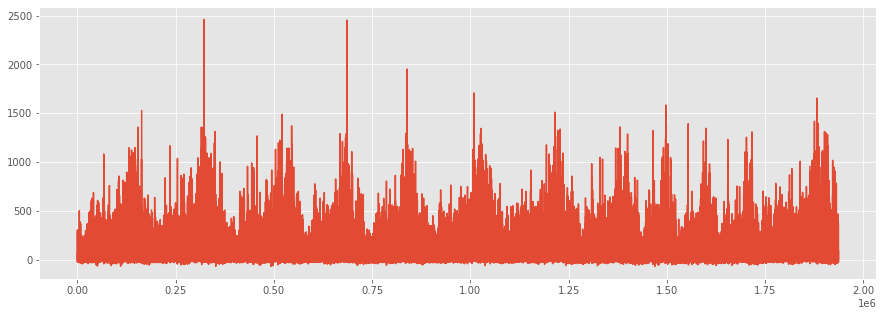

In [18]:
print("Finalment, ràpidament sense profunditzar més. Fent un plot del ArrDelay,\n \
si les dades estàn ordenades per data, sembla que pugui haver-hi un patró \n\
de menys a més retràs que es repeteixi...")
workdf['ArrDelay'].plot()



# Exercici 3: Exportació del dataset net
---
Exporta el data set net i amb les noves columnes a Excel.

In [19]:
# determining the name of the file
file_name1 = './DelayedFlights_processed_1.xlsx'
file_name2 = './DelayedFlights_processed_2.xlsx'
file_name3 = './DelayedFlights_processed_1.csv'  
# saving the excel
# workdf.to_excel(file_name1) # No funciona, màx rows 1M
# print("Hi ha una limitació a Excel, que el màxim de files es 1048576 rows.")
# print("Per lo que creem 2 arxius per exportar el DataFrame")
# workdf.iloc[:1000000].to_excel(file_name1)
# workdf.iloc[1000000:].to_excel(file_name2)
# print('DataFrame is written to Excel File successfully.')
print("Tampoc funciona perque agafa tota la memòria del Colab")
print("Una altra opció es exportar-ho directament a CSV")
workdf.to_csv(file_name3)

Tampoc funciona perque agafa tota la memòria del Colab
Una altra opció es exportar-ho directament a CSV


## Captures de pantalla
Aquí es mostra com quan s'intenta exportar 1M registres a excel, tota la memoria asignada pel Collab (12Gb) es satura. 
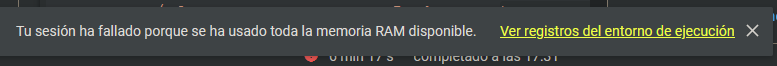

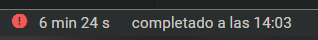

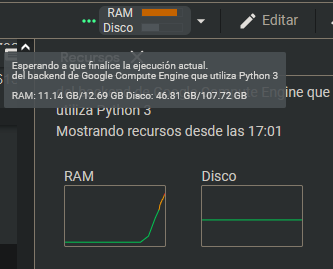